# Sales Prediction Using Python

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let' s embark on the journey of sales prediction using machine learning in Python.

Dataset: [advertising.csv](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

# Loading and Exploring the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# Load the CSV file
path = '/content/drive/MyDrive/advertising.csv'
df = pd.read_csv(path, encoding='latin1')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated().sum()

0

# Data Visualization

# Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Histogram Subplots

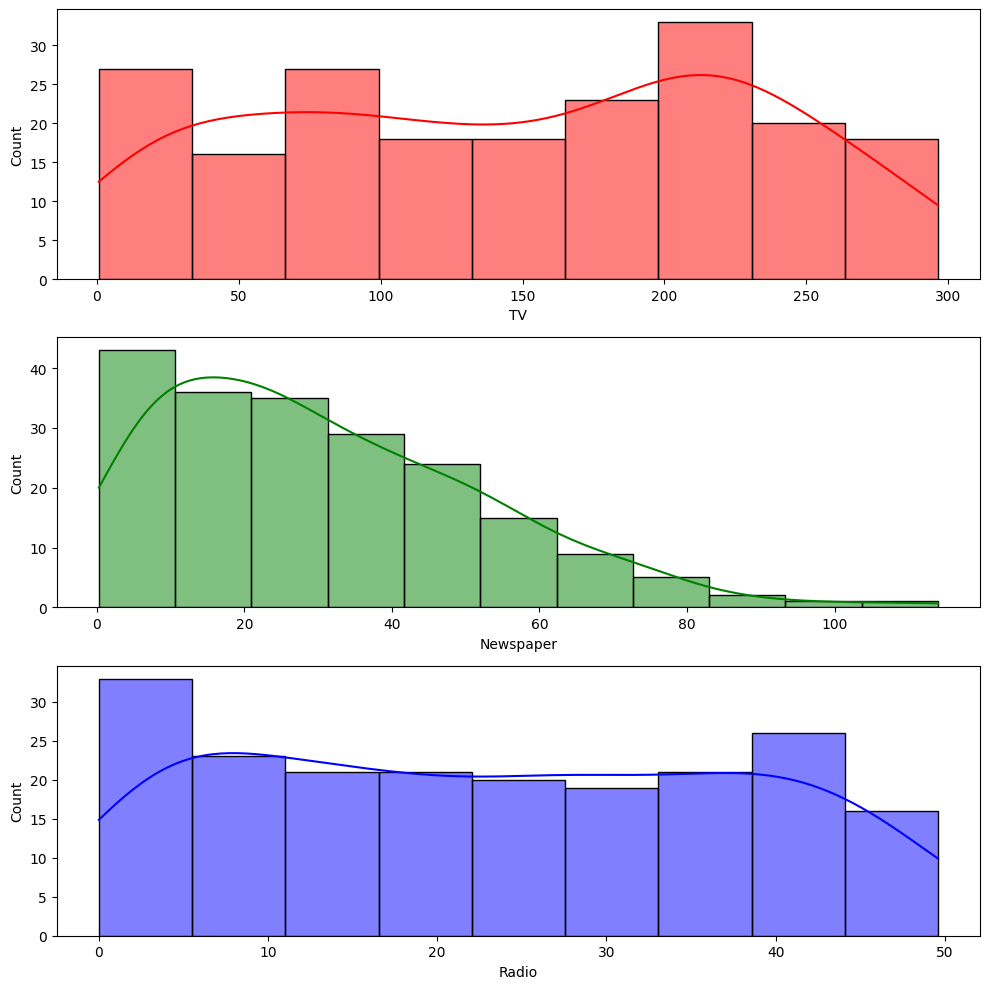

In [ ]:
fig, axs = plt.subplots (3, figsize = (10,10))

plt1 = sns.histplot(df['TV'], color='red', kde=True, ax = axs[0])
plt2 = sns.histplot(df['Newspaper'], color='green', kde=True, ax = axs[1])
plt3 = sns.histplot(df['Radio'], color='blue', kde=True, ax = axs [2])
plt.tight_layout()

# Sales Distribution

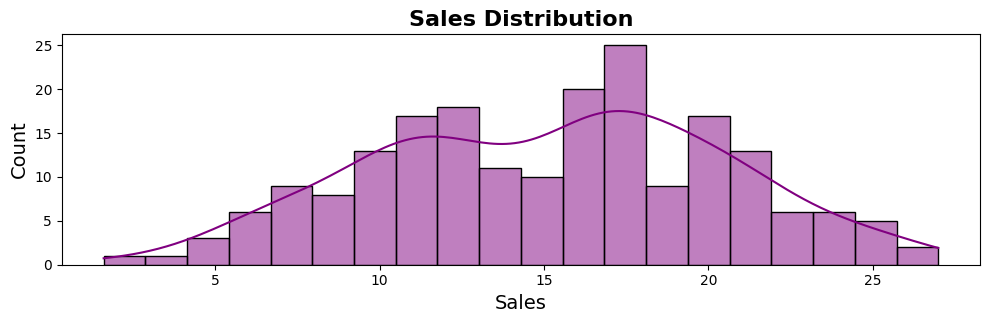

In [ ]:
fig, axs = plt.subplots(1, figsize=(10, 3.33))

sns.histplot(df['Sales'], bins=20, kde=True, color='purple', edgecolor='black', linewidth=1, ax=axs)

axs.set_title('Sales Distribution', fontsize=16, weight='bold', loc='center')
axs.set_xlabel('Sales', fontsize=14)
axs.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

# Scatter Plots

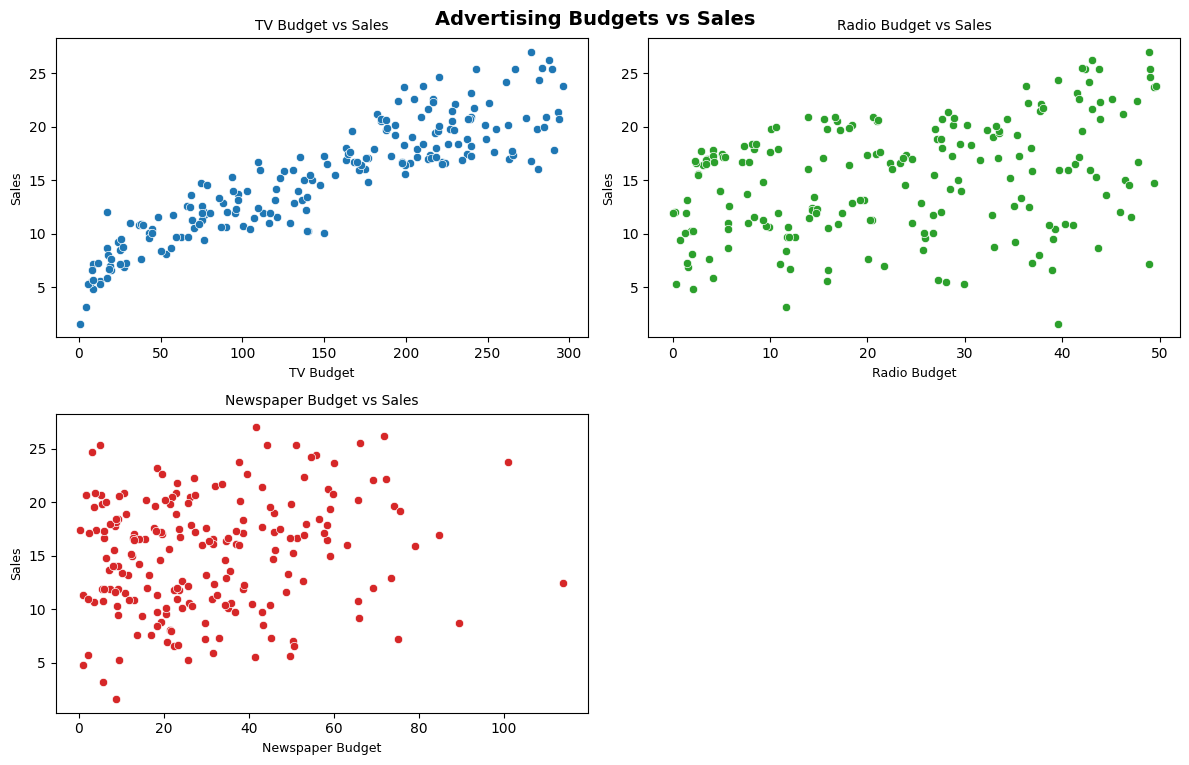

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Advertising Budgets vs Sales", fontsize=14, fontweight='bold', y=0.95)

sns.scatterplot(ax=axes[0, 0], x='TV', y='Sales', data=df, color='#1f77b4')
axes[0, 0].set_title("TV Budget vs Sales", fontsize=10)
axes[0, 0].set_xlabel("TV Budget", fontsize=9)
axes[0, 0].set_ylabel("Sales", fontsize=9)

sns.scatterplot(ax=axes[0, 1], x='Radio', y='Sales', data=df, color='#2ca02c')
axes[0, 1].set_title("Radio Budget vs Sales", fontsize=10)
axes[0, 1].set_xlabel("Radio Budget", fontsize=9)
axes[0, 1].set_ylabel("Sales", fontsize=9)

sns.scatterplot(ax=axes[1, 0], x='Newspaper', y='Sales', data=df, color='#d62728')
axes[1, 0].set_title("Newspaper Budget vs Sales", fontsize=10)
axes[1, 0].set_xlabel("Newspaper Budget", fontsize=9)
axes[1, 0].set_ylabel("Sales", fontsize=9)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Box Plots

In [ ]:
melted_data = df.melt(id_vars='Sales', value_vars=['TV', 'Radio', 'Newspaper'],
                        var_name='Advertising Channel', value_name='Budget')

fig = px.box(melted_data, x='Advertising Channel', y='Budget', color='Advertising Channel',
             title='Distribution of Advertising Budgets Across Channels',
             labels={'Budget': 'Budget (in $1000s)', 'Advertising Channel': 'Channel'})

fig.show()

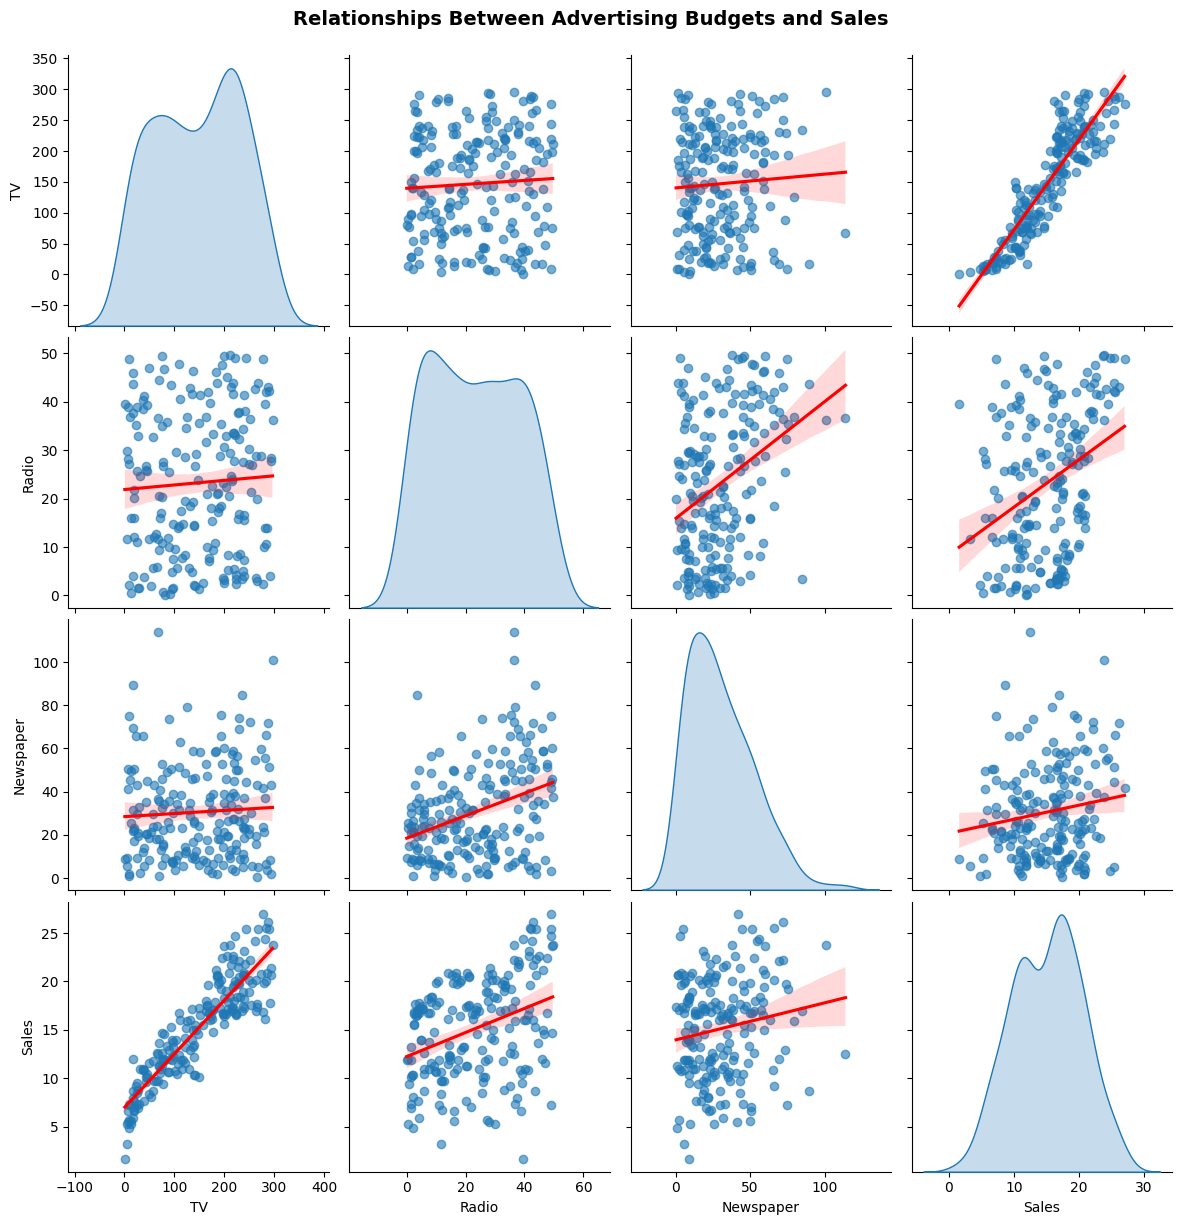

In [ ]:
sns.pairplot(df, kind="reg", diag_kind="kde", height=3, aspect=1, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.suptitle("Relationships Between Advertising Budgets and Sales", y=1.02, fontsize=14, fontweight='bold')
plt.show()

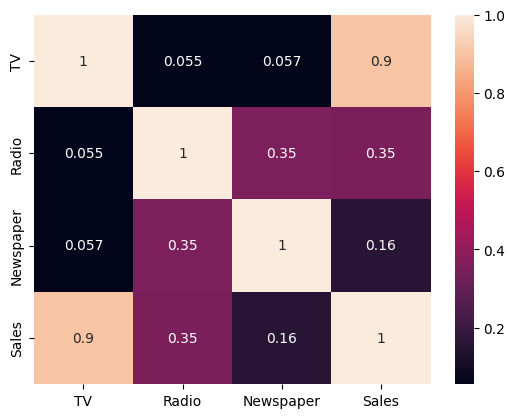

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building

# Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature Engineering

In [ ]:
df['Total_Ad_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
df['TV_Radio_Interaction'] = df['TV'] * df['Radio']

In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[['TV', 'Radio', 'Newspaper', 'Sales']]))
df = df[(z_scores < 3).all(axis=1)]

# Data Splitting

In [ ]:
X = df[['TV', 'Radio', 'Newspaper', 'Total_Ad_Spend', 'TV_Radio_Interaction']]
y = df['Sales']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print (X_train)

[[6.28883578e-01 8.85080645e-01 1.57126824e-02 5.60020476e-01
  5.99472985e-01]
 [2.73130761e-02 9.85887097e-01 8.38383838e-01 3.09444587e-01
  3.14192849e-02]
 [4.73199044e-01 2.92338710e-01 1.11111111e-01 3.89813156e-01
  1.49171997e-01]
 [2.48207579e-01 3.42741935e-01 1.41414141e-01 2.34450985e-01
  9.21537826e-02]
 [8.29634688e-02 2.21774194e-01 3.29966330e-01 1.38213463e-01
  2.03095770e-02]
 [6.45271424e-02 4.05241935e-01 1.87429854e-01 1.15177886e-01
  2.90951308e-02]
 [4.59201093e-01 8.40725806e-01 5.11784512e-01 5.40312260e-01
  4.16371439e-01]
 [7.13212701e-01 4.15322581e-01 1.16722783e-01 5.86639365e-01
  3.18879561e-01]
 [7.88665073e-02 7.07661290e-01 7.36251403e-01 2.89480420e-01
  6.16953253e-02]
 [9.08842608e-01 8.83064516e-01 5.27497194e-02 7.78090607e-01
  8.63357904e-01]
 [6.50051212e-01 5.78629032e-01 2.00897868e-01 5.79216790e-01
  4.05051989e-01]
 [7.03994537e-01 1.69354839e-01 2.92929293e-01 5.88686972e-01
  1.28353573e-01]
 [8.08125640e-01 5.54435484e-01 1.200897

In [ ]:
print(y_train)

139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
       ... 
108     5.3
14     19.0
93     22.2
181    17.2
104    20.7
Name: Sales, Length: 158, dtype: float64


In [ ]:
print(X_test)

[[0.10515534 0.49596774 0.02132435 0.1192731  0.0572287 ]
 [0.47285763 0.28830645 0.28395062 0.42846174 0.14700884]
 [0.95834756 0.7983871  0.62289562 0.93447658 0.82297656]
 [0.35472858 0.11491935 0.38271605 0.34041464 0.04403264]
 [0.03755548 0.74395161 0.50392817 0.21013565 0.03188456]
 [0.74974394 0.98790323 0.0325477  0.66751984 0.79722106]
 [0.75042677 0.66935484 0.42199776 0.71640645 0.54064833]
 [0.38306589 0.35080645 0.4298541  0.40235475 0.14508128]
 [0.50051212 0.48185484 0.21099888 0.45712823 0.2599973 ]
 [0.96824855 0.21370968 0.0684624  0.74123368 0.22256195]
 [0.58654831 0.36491935 0.34118967 0.536473   0.23058755]
 [0.66473199 0.96169355 0.59034792 0.72766829 0.68835286]
 [0.02253329 0.56653226 0.46127946 0.16662401 0.01514947]
 [0.46261523 0.38709677 0.18294052 0.41028922 0.19312857]
 [0.25844998 0.01612903 0.1627385  0.20552854 0.0045139 ]
 [0.30385797 0.19959677 0.3973064  0.31635526 0.06558369]
 [0.02424036 0.78427419 0.56453423 0.21909393 0.02240848]
 [0.67975418 0

In [ ]:
print(y_test)

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    20.0
160    16.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      15.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    16.9
119     6.6
177    16.7
70     18.3
77     14.2
127    11.9
83     13.6
25     17.0
193    19.6
97     20.5
173    16.7
20     18.0
152    16.6
Name: Sales, dtype: float64


# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Support Vector Machine (SVM)

In [ ]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation

In [ ]:
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "SVM Regression"],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_svm)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_svm))],
    "R2 Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_svm)]
})

metrics

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.146286,1.399328,0.929481
1,SVM Regression,1.168657,1.489607,0.920088


In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
predictions = model.get_prediction(sm.add_constant(X_test))

confidence_intervals = predictions.conf_int()
print("Confidence Intervals for Predictions:\n", confidence_intervals)

Confidence Intervals for Predictions:
 [[ 8.19818138  9.3288067 ]
 [13.46789809 14.05585809]
 [24.41356936 25.82482828]
 [10.92194222 11.84762908]
 [ 7.9347961   9.23045963]
 [21.41238101 23.10297548]
 [20.04272371 20.82377919]
 [12.49854985 13.15879134]
 [14.80236864 15.39274976]
 [19.53850153 20.93129515]
 [15.60571782 16.17436096]
 [20.31874051 21.45128794]
 [ 7.38562537  8.4428087 ]
 [13.71777757 14.32269664]
 [ 9.00167373 10.14800882]
 [10.60032732 11.47102705]
 [ 7.76595544  9.19391207]
 [14.75734946 15.80523144]
 [ 9.26883498 10.12139416]
 [11.10386902 11.91405036]
 [11.79299338 12.75122613]
 [16.7613917  17.81618613]
 [23.66763606 25.05601924]
 [ 7.08001557  8.20531635]
 [18.30212686 19.10091887]
 [20.972062   22.12471755]
 [ 7.77364352  8.86688433]
 [16.39892956 18.50541575]
 [ 7.35084651  8.3596286 ]
 [14.23166408 15.0704057 ]
 [18.54898104 19.20730912]
 [13.65844653 14.40998301]
 [ 9.05624651 10.22065829]
 [11.79641256 12.99958672]
 [17.49328207 18.96640716]
 [17.3929296  18

# Scatter Plots

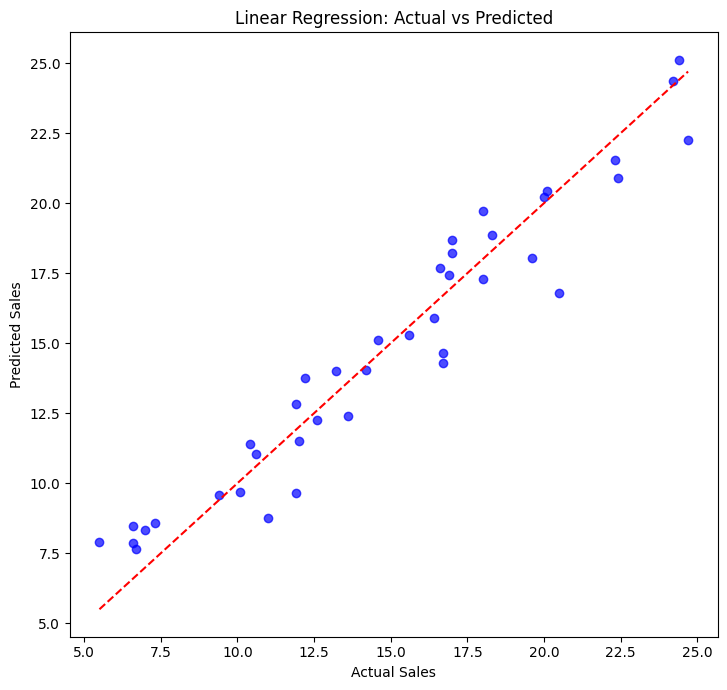

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

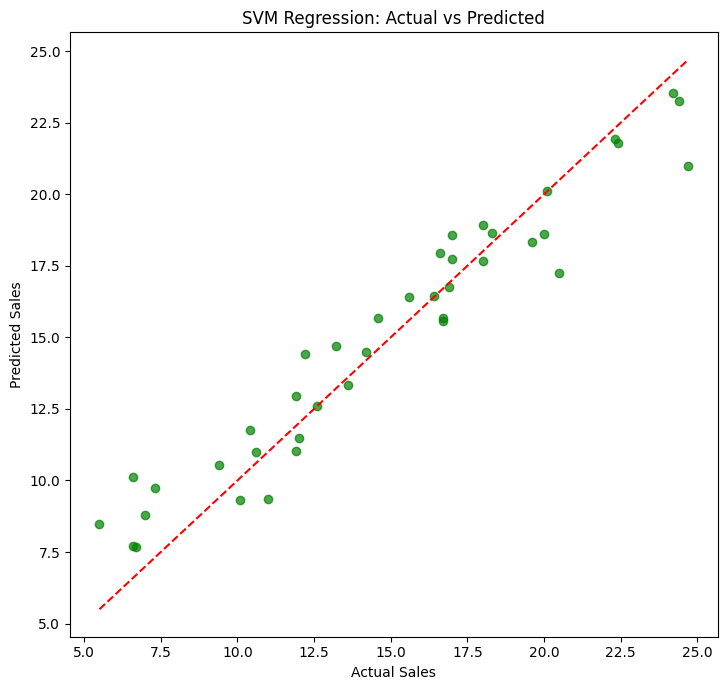

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svm, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('SVM Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

# Conclusion

In [ ]:
best_model = 'SVM Regression' if metrics.loc[1, 'R2 Score'] > metrics.loc[0, 'R2 Score'] else 'Linear Regression'

print(f"Based on the evaluation metrics, the best model for sales prediction is: {best_model}")
print("\nModel Evaluation Summary:")
print(metrics)

if best_model == 'SVM Regression':
    print("\nInsight: SVM Regression performs better in capturing complex non-linear relationships between features and sales, providing higher accuracy and a better R² score. This model is a good choice when the data exhibits intricate patterns or interactions that a simple linear model cannot capture.")
else:
    print("\nInsight: Linear Regression is a simpler and more interpretable model. It performs well when there is a linear relationship between the features and sales. This model is faster and requires less computational power, making it ideal for datasets with clear linear patterns.")

Based on the evaluation metrics, the best model for sales prediction is: Linear Regression

Model Evaluation Summary:
               Model       MAE      RMSE  R2 Score
0  Linear Regression  1.146286  1.399328  0.929481
1     SVM Regression  1.168657  1.489607  0.920088

Insight: Linear Regression is a simpler and more interpretable model. It performs well when there is a linear relationship between the features and sales. This model is faster and requires less computational power, making it ideal for datasets with clear linear patterns.
